Load Map and Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# 1. Load Fire Data
# Since your notebook is in the main folder, we just look in 'Data/cleaned_fires_nepal.csv'
# (Note: I see your folder is named 'Data' with a capital D in the screenshot)
csv_path = 'Data/cleaned_fires_nepal.csv'

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"SUCCESS: Loaded {len(df)} fire records.")
else:
    print(f"ERROR: Could not find '{csv_path}'. Check the folder name!")

# 2. Load Map Data
# Your map is in 'Data/raw/nepal_districts.shp'
map_path = 'Data/raw/nepal_districts.shp'

if os.path.exists(map_path):
    nepal_map = gpd.read_file(map_path)
    # Fix "Amnesia" (Missing CRS)
    if nepal_map.crs is None:
        nepal_map.set_crs(epsg=4326, inplace=True)
    else:
        nepal_map = nepal_map.to_crs(epsg=4326)
    print("SUCCESS: Nepal Map loaded.")
else:
    print(f"ERROR: Could not find '{map_path}'.")

SUCCESS: Loaded 11291 fire records.
SUCCESS: Nepal Map loaded.


Generate the Map

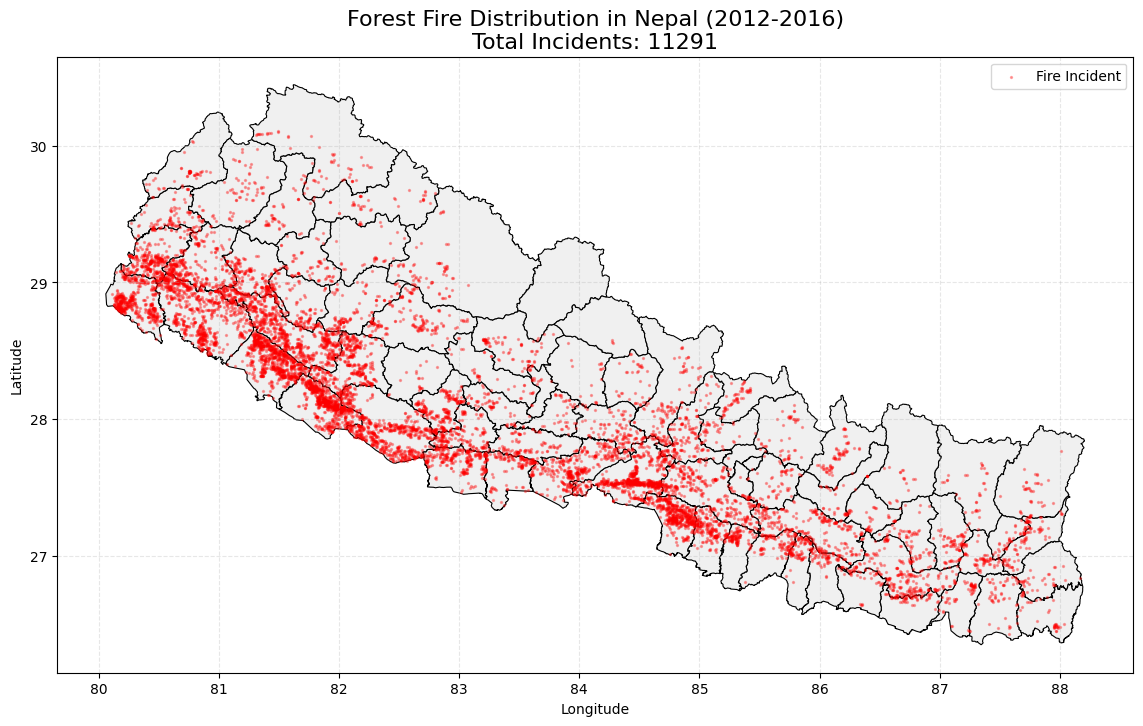

In [2]:
# Create a large figure (15 inches wide)
fig, ax = plt.subplots(figsize=(15, 8))

# 1. Draw Nepal (Background)
# color='#f0f0f0' is a light grey
nepal_map.plot(ax=ax, color='#f0f0f0', edgecolor='black', linewidth=0.8)

# 2. Draw Fires (Overlay)
# alpha=0.3 makes them transparent so you can see where they pile up
plt.scatter(x=df['longitude'], y=df['latitude'], c='red', s=2, alpha=0.3, label='Fire Incident')

# 3. Add Labels and Titles
plt.title(f"Forest Fire Distribution in Nepal (2012-2016)\nTotal Incidents: {len(df)}", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Show the map
plt.show()